# The spark foundation Internship Data Science and Business Analytics

# Task 2: Prediction using unspervise Machine Learning 

# In this task it is required to predict the optimum number of cluster ofr the iris data set consoist of flower 
namely iris sentosa iris-versicolor and iris-virginica

1. Import the data set
2. Visualize the data.
3. Finding the optimum number of cluster.
4. Applying K-Means clustering on data.
5. Visualizing the cluster.

Author: Rutik Parmar

# Step1: Impoert the data set
    

In [ ]:
# Impoert required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
    
# ignore the warning
import warning as wg
wg.filter.warnings('ignore')

In [4]:
# reading data iris dataset
df=pd.read_csv('iris.csv')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step 2: Visualize the Data

In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 6)

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
# now we will drop the label data set because it is an unsupervise learing model
iris=pd.DataFrame(df)
iris_df=iris.drop(columns=['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 3: Finding the optimum number of cluster.
There are various method availabe but we are use Elbow method.

Brief about the Elbow method
In this method, number of cluster are various within a cartain range. for each cluster within cluster sum of square 
value is calculated and stored in a list. This value are then plottd against the range of number of clusters used before. 
The location of 2d plot indicate the appropriate number of clusters.   

In [21]:
# calculate the within-cluseter sum of square
within_cluster_sum_of_square=[]

clusters_range=range(1,15)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km= km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Dell\AppData\Local\Temp/ipykernel_8128/2476419879.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')


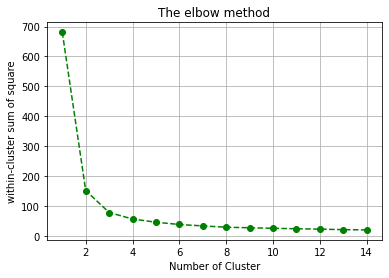

In [26]:
# plotting the "within cluster sum of square" against cluster range
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('within-cluster sum of square')
plt.grid()
plt.show()

# we can see the elbow method base on above graph
from this we can choose the number of cluster is ****3****

# Step 4: Applying K means clustering on data

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init= 'k-means++', max_iter = 300, n_init= 10, random_state=0)
predictions = model.fit_predict(iris_df)

# step 5: Visualising the cluster

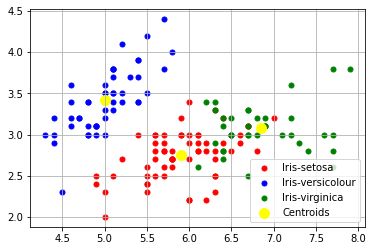

In [34]:
x= iris_df.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions == 0,0],x[predictions == 0,1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0],x[predictions == 1,1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2,0],x[predictions == 2,1], s = 25, c = 'green', label = 'Iris-virginica')

# plotting the cluster centers

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()